# Transfer Function in the Frequency Domain -- Frequency Response
### *Chapter 4 Section 5* -- AC Steady State Analysis

## Drill Problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Problem 1
1. Draw the amplitude response in logarithmic scale (Bode plot) for the transfer function
$$ K(s) = \frac{A+Bs}{C+Ds}$$
    and the following combinations of its coefficients:
    1. $A=0.1$, $B=0$, $C=1$, $D=10$; 
    2. $A=1$, $B=0.1$, $C=0$, $D=1$; 
    3. $A=0$, $B=10$, $C=1$, $D=10$.   

$$ K_\mathrm{dB}(\omega) = 20\log\Gamma + 10\log\big(1 + \omega^2 T_{L1}^2\big) - 10\log\big(1+\omega^2 T_{M1}^2\big)$$

where,  

$$ \Gamma = \frac{A}{C}\quad\quad T_{L1} = \frac{B}{A}\quad\quad T_{M1} = \frac{D}{C}$$

In the **case of A**:  

$$ \Gamma = 0.1 \quad\quad T_{L1} = 0\quad\quad T_{M1} = 10$$

Thus,  

$$ K_\mathrm{dB}(\omega) = -20 - 10\log\big(1 + 100\omega^2\big)$$

Thus cutoff frequency is:  

$$ \omega_\mathrm{c} = \frac{1}{T_{M1}} = 0.1\,\mathrm{rad}/\mathrm{s}$$

The radian frequency $\omega$ as a function of one interval on the $\omega$-axis  at the logarithmic scale is given by:  

$$ \omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^{x-3}\,\mathrm{rad}/\mathrm{s}$$

The *uncorrected* Bode plot is given by $f(x)$, where,  

$$ f(x) = -20 \quad\quad\text{for }\; \omega \le \omega_\mathrm{c}$$

Note that:  

$$ \omega \le \omega_\mathrm{c} \quad\implies\quad x-3 \le -1 \quad\implies\quad x \le 2$$

And,  

$$ f(x) = -40 - 20\log10^{x-3} = -40 - 20(x-3) = 20 - 20x \quad\quad\text{for }\;x\ge 2$$

In [2]:
log = np.log10
sqrt = np.sqrt

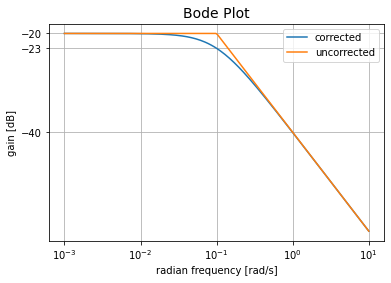

In [4]:
# Create the radian frequency domain at the logarithmic scale.
x = np.linspace(0, 4, num=200)
omega = 10**(x-3)

# Define the functions that give the (un)corrected Bode plot(s).
K_dB = -20-10*log(1+100*omega**2)
f = [-20 if x_i <= 2 else 20 - 20*x_i for x_i in x]

# Create the figure and axes objects.
fig, ax = plt.subplots()
ax.set_title('Bode Plot', size=14)
ax.set_xlabel('radian frequency [rad/s]')
ax.set_ylabel('gain [dB]')

ax.set_xticks([0,1,2,3,4], [r'$10^{' + str(i - 3) + r'}$' for i in range(5)])
ax.set_yticks([-20, -23, -40, -60])
ax.grid()

# Plot the data.
ax.plot(x, K_dB, label='corrected')
ax.plot(x, f, label='uncorrected')
ax.legend()

In the **case of B**:  

$$ K(j\omega) = \frac{1 + j0.1\omega}{j\omega} = 0.1-j\frac{1}{\omega} = \frac{0.1\omega - j}{\omega}$$

$$ K(\omega) = \sqrt{0.01 + \frac{1}{\omega^2}}\quad\implies\quad K_\mathrm{dB}(\omega) = 10\log\left(0.01+ \frac{1}{\omega^2}\right)$$

$$ K_\mathrm{dB}(\omega) = 10\log\frac{\omega^2 + 100}{100\omega^2} = 10\log\big(\omega^2+100\big) -20\log(10\omega) = 10\log\big(\omega^2+100\big) - 20 - 20\log\omega$$

$$  = 10\log\Big(100\big((0.1\omega)^2 + 1\big)\Big) - 20 - 20\log\omega$$

The gain, in decibels, is given by:  

$$ K_\mathrm{dB}(\omega) = 10\log\big((0.1\omega)^2+1\big) - 20\log\omega$$

The cutoff frequency is given by:  

$$ \omega_\mathrm{c} = 10\,\mathrm{rad}/\mathrm{s}$$

The radian frequency $\omega$ as a function of one interval on the the $\omega$-axis  at the logarithmic scale is given by:  

$$ \omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^{x-1}$$

Finally, the *uncorrected* Bode plot is given by $f(x)$, where,  

$$ f(x) = -20(x-1) = 20(1-x) \quad\quad\text{for }\;\omega\le\omega_\mathrm{c}$$

$$ \omega\le\omega_\mathrm{c} \quad\implies\quad x-1\le1 \quad\implies\quad x\le2$$

$$ f(x) = 20\log(0.1\omega) - 20\log\omega = 20\log0.1 = -20\quad\quad\text{for}\;x\ge2$$

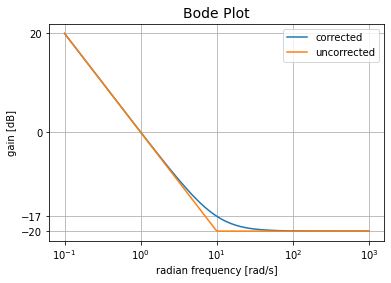

In [6]:
# Create the radian frequency domain at the logarithmic scale.
x = np.linspace(0, 4, num=200)
omega = 10**(x-1)

# Define the functions that give the (un)corrected Bode plot(s).
K_dB = 10*log((0.1*omega)**2 + 1) - 20*log(omega)
f = [20*(1-x_i) if x_i <= 2 else -20 for x_i in x]

# Create the figure and axes objects.
fig, ax = plt.subplots()
ax.set_title('Bode Plot', size=14)
ax.set_xlabel('radian frequency [rad/s]')
ax.set_ylabel('gain [dB]')

ax.set_xticks([0,1,2,3,4], [r'$10^{' + str(i - 1) + r'}$' for i in range(5)])
ax.set_yticks([20, 0, -20, -17])
ax.grid()

# Plot the data.
ax.plot(x, K_dB, label='corrected')
ax.plot(x, f, label='uncorrected')
ax.legend()

In the **case of C**)  $A=0$, $B=10$, $C=1$, $D=10$:  

$$ K(j\omega) = \frac{j10\omega}{1 + j10\omega} \quad\implies\quad K(\omega) = \frac{10\omega}{\sqrt{1 + 100\omega^2}}$$

The gain, in decibels, is given by:  

$$ K_\mathrm{dB}(\omega) = 20\log(10\omega) - 10\log\big(1+100\omega^2\big) = 20 + 20\log\omega - 10\log\big(1+(10\omega)^2\big)$$

The cutoff frequency is:  

$$ \omega_\mathrm{c} = 0.1\,\mathrm{rad}\,\mathrm{s} $$

The radian frequency $\omega$ as a function of one interval on the $\omega$-axis  at the logarithmic scale is given by:  

$$ \omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^{x-3}\,\mathrm{rad}/\mathrm{s}$$

Finally, the *uncorrected* Bode plot is given by:  

$$ f(x) = 20 + 20(x-3) = 20x -40\quad\quad\text{for }\;\omega\le\omega_\mathrm{c}$$

$$ \omega\le\omega_\mathrm{c}\quad\implies\quad x-3\le-1\quad\implies\quad x\le2$$

and,  

$$ f(x) = 20x - 40 - 20\log(10\omega) = 20x - 40 - 20 - 20(x-3) = 0 \quad\quad\text{for }\;x\ge2$$

#### Problem 2
2. Draw the logarithmic plot of the RC high(low)-pass filter, $R=10\mathrm{k}\Omega$, $C=1\mu\mathrm{F}$.

For the **low pass filter**:  

\begin{equation}\tag{3}
    K(j\omega) = \frac{1}{1+j\omega T}\quad\quad\text{where }\;T = RC
\end{equation}

And,  

$$ K(\omega) = \frac{1}{\sqrt{1+(\omega T)^2}} \quad\implies\quad K_\mathrm{dB}(\omega) = -10\log\big(1+(\omega T)^2\big)$$

The cutoff or half-power frequency is:  

$$ \omega_\mathrm{c} = \frac{1}{T} = \frac{1}{RC} = \frac{1}{10\mathrm{m}[\Omega\cdot\mathrm{F}]} = 100\,\mathrm{rad}/\mathrm{s}$$

The radian frequency $\omega$ as a function of one interval on the $\omega$-axis at the logarithmic scale is given by:  

$$\omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^x\,\mathrm{rad}/\mathrm{s}$$

The *uncorrected* Bode plot is given by:  

$$ f(x) = 0 \quad\quad\text{for }\;\omega\le\omega_\mathrm{c}$$

$$ \omega\le\omega_\mathrm{c} \quad\implies\quad x\le2$$

and,  

$$ f(x) = -20\log\big(0.01\omega(x)\big) = 40 - 20x \quad\quad\text{for }\;x\ge2$$

Now, for the **high pass filter**:  

$$ K(j\omega) = \frac{j\omega T}{j\omega T+1} \quad\quad\text{where }\; T=RC = 10\mathrm{ms} = 0.01\mathrm{s}$$

$$ K(\omega) \frac{\omega T}{\sqrt{1+(\omega T)^2}} \quad\implies\quad K_\mathrm{dB}(\omega) = 20\log(\omega T) - 10\log\big(1+(\omega T)^2\big)$$

$$ K_\mathrm{dB}(\omega) = 20\log\omega  - 40 - 10\log\big(1+(\omega T)^2\big)$$

The cutoff frequency is given by:  

$$ \omega_\mathrm{c} = \frac{1}{T} = 100\,\mathrm{rad}/\mathrm{s}$$

The radian frequency $\omega$ as a function of one interval on the $\omega$-axis at the logarithmic scale is given by:  

$$ \omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^x\,\mathrm{rad}/\mathrm{s}$$

Finally, the *uncorrected* Bode plot is given by:  

$$ f(x) = 20x - 40 \quad\quad\text{for }\; x\le2$$

and,  

$$ f(x) = 20x - 40 - 20\log(\omega T) = 0 \quad\quad\text{for }\;x\ge2$$

#### Problem 3
3. Draw the logarithmic plot of the ideal integrator (differentiator) characterized by the integration (differentiation) constant $T=10\mathrm{s}$.

For the ideal **integrator**:  

$$ K(j\omega) = \frac{1}{j\omega T} \quad\implies\quad K(\omega) = \frac{1}{\omega T} \quad\implies\quad K_\mathrm{dB}(\omega) = -20\log(\omega T) = -20-20\log\omega$$

The cutoff or half-power frequency is given by:  

$$ K(\omega_\mathrm{c}) = \frac{1}{\sqrt{2}} \quad\implies\quad \omega_\mathrm{c}T = \sqrt{2}$$

$$ \omega_\mathrm{c} = \frac{\sqrt{2}}{10}\,\left[\frac{\mathrm{rad}}{\mathrm{s}}\right]$$

The radian frequency $\omega$ as a function of one interval on the $\omega$-axis at the logarithmic scale is given by:  

$$ \omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^{x-3}\sqrt{2}\,\mathrm{rad}/\mathrm{s}$$

The bode plot is given by:  

$$ f(x) = -20 - 20(x-3) - 10\log2 = 40 - 20x -10\log2$$

And, for the ideal **differentiator**:  

$$ K(j\omega) = j \omega T \quad\implies\quad K(\omega) = \omega T \quad\implies\quad K_\mathrm{dB}(\omega) = 20\log(\omega T)$$

$$ K_\mathrm{dB}(\omega) = 20 + 20\log\omega$$

$$ \omega_\mathrm{c} = \frac{1}{10\sqrt{2}} = 0.1\sqrt{2}\,\mathrm{rad}/\mathrm{s}$$

$$ \omega = \omega(x) = 10^{x-2}\omega_\mathrm{c} = 10^{x-3}\sqrt{2}\,\mathrm{rad}/\mathrm{s} $$

$$ f(x) = 20 + 20(x-3) + 10\log2 = 20x + 10\log2 - 40$$